In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy, math
from utils import *

In [2]:
X_train = np.array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862, 5.0546])
y_train = np.array([17.592, 9.1302, 13.662, 11.854, 6.8233, 11.886, 4.3483, 12, 6.5987, 3.8166])

In [3]:
print(X_train)

[6.1101 5.5277 8.5186 7.0032 5.8598 8.3829 7.4764 8.5781 6.4862 5.0546]


In [4]:
type(X_train)

numpy.ndarray

In [5]:
print(y_train)

[17.592   9.1302 13.662  11.854   6.8233 11.886   4.3483 12.      6.5987
  3.8166]


In [6]:
type(y_train)

numpy.ndarray

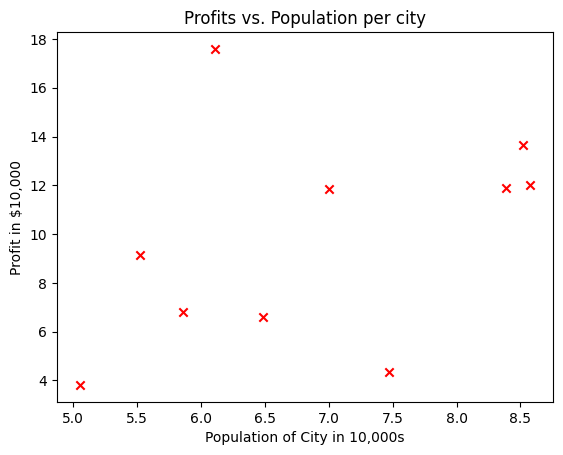

In [7]:
plt.scatter(X_train, y_train, marker='x', c='r')
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()

In [8]:
def compute_cost(X, y, w, b):
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """

    m = X.shape[0]
    total_cost = 0.

    for i in range(m):
        cost = ((X[i] * w + b) - y[i]) ** 2
        total_cost += cost
    total_cost /= 2 * m

    return total_cost

In [9]:
initial_w = 2
initial_b = 1

cost = compute_cost(X_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

<class 'numpy.float64'>
Cost at initial w: 20.310


In [11]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model 
      
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """

    m = X.shape[0]
    dj_dw, dj_db = 0., 0.

    for i in range(m):
        cost_dw = ((X[i] * w + b) - y[i]) * X[i]
        cost_db = (X[i] * w + b) - y[i]

        dj_dw += cost_dw
        dj_db += cost_db

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [12]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -69.45159589 -9.771109999999997


In [13]:
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -58.2474330476 -8.191158


In [14]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
      
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """

    m = len(X)
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  
    b = b_in

    for i in range(num_iters):

        dj_dw, dj_db = compute_gradient(X, y, w, b )  

        w -= alpha * dj_dw               
        b -= alpha * dj_db               

        if i<100000:       
            J_history.append(compute_cost(X, y, w, b))
            
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history

In [15]:
initial_w = 0.
initial_b = 0.

iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost    19.57   
Iteration  150: Cost     7.34   
Iteration  300: Cost     7.34   
Iteration  450: Cost     7.34   
Iteration  600: Cost     7.34   
Iteration  750: Cost     7.34   
Iteration  900: Cost     7.34   
Iteration 1050: Cost     7.34   
Iteration 1200: Cost     7.34   
Iteration 1350: Cost     7.34   
w,b found by gradient descent: 1.3705405167767037 0.3087127231997825


In [16]:
m = X_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * X_train[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

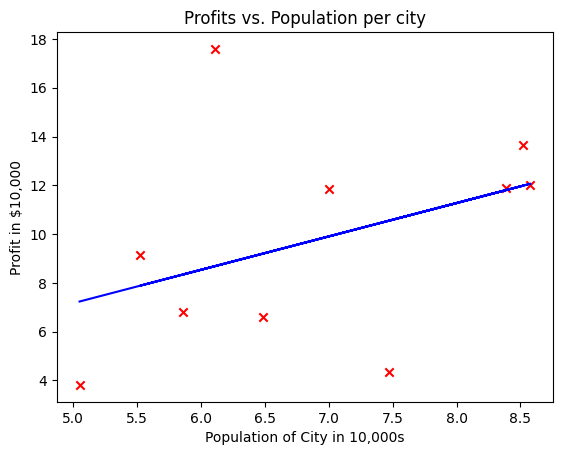

In [17]:
plt.plot(X_train, predicted, c = "b") 
plt.scatter(X_train, y_train, marker='x', c='r') 
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')

In [18]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $51056.05
For population = 70,000, we predict a profit of $99024.96
